<h2 align="center">Projeto 4</h2>
<p align="center">
  Matéria: Álgebra Linear Numérica<br>
  Professor: Bernardo Freitas<br>
  Alunos: Bruno Ferreira Salvi e Elisa de Oliveira Soares<br>
  Data: 06/2025
</p>


Imports ao longo do trabalho:

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import time
from scipy.stats import norm

### Questão 1. Matrizes Gaussianas. Uma matriz gaussiana tem todas as entradas Aij independentes e distribuídas segundo uma normal padrão, ou seja, Aij ∼ N (0, 1).

### a) Distribuição das normas. Faça um histograma da norma-2 das colunas de uma matriz gaussiana A, m × n. Use vários valores de m, e comente o que você observa.

Text(0.5, 1.02, 'Histograma das normas-2 das colunas de uma matriz gaussiana')

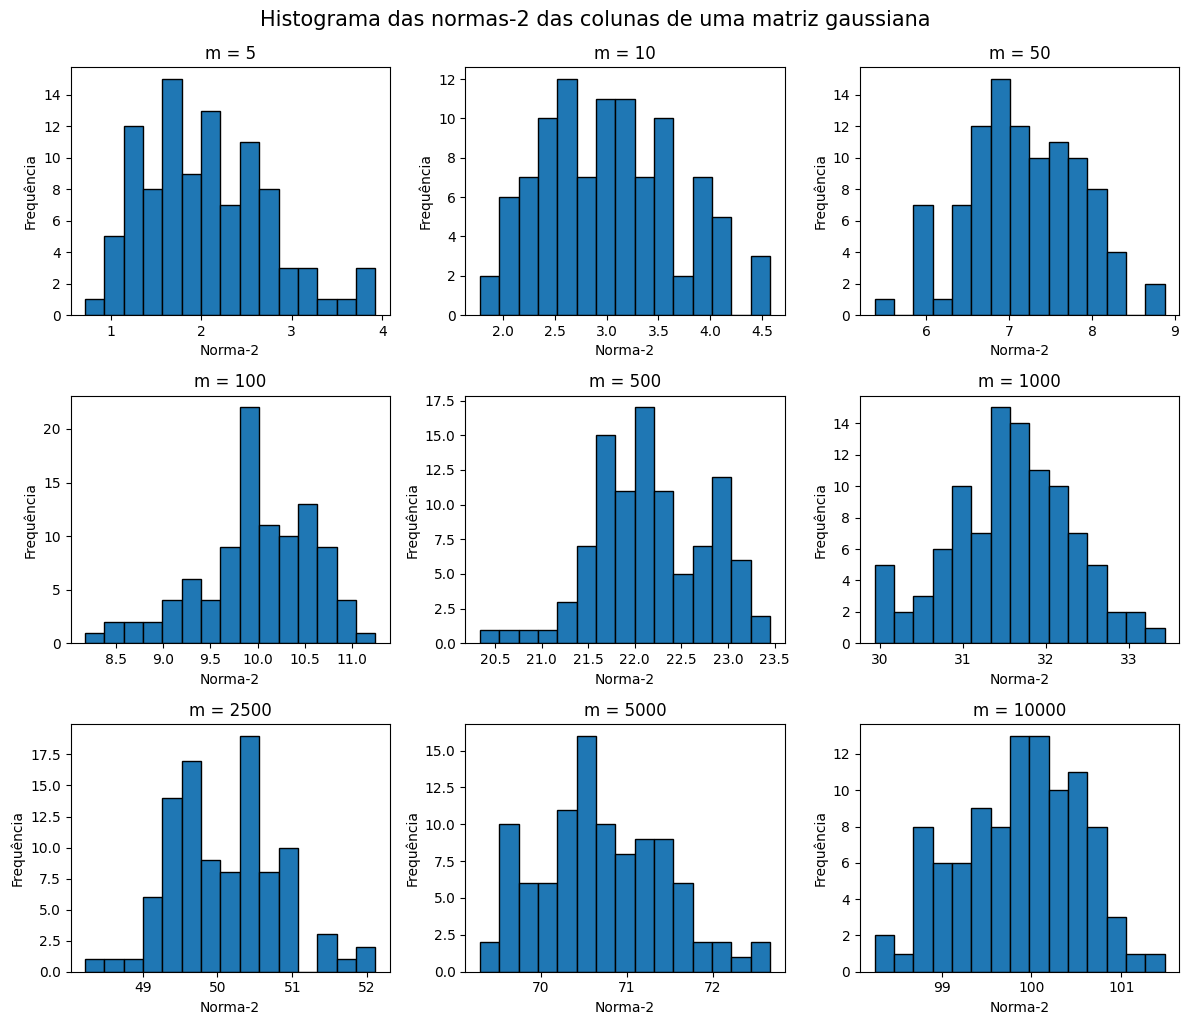

In [6]:
m_s = [5, 10, 50, 100, 500, 1000, 2500, 5000, 10000]
i=0

plt.figure(figsize=(12, 10))

for m in m_s:
    A = np.random.normal(0, 1, size=(m, 100)) # ESCOLHER UM n
    
    # Calcula norma-2 das colunas
    normas = np.linalg.norm(A, axis=0)
    i += 1
    
    # Plota histograma
    plt.subplot(3, 3, i)
    plt.hist(normas, bins=15, edgecolor='black')
    plt.title(f"m = {m}")
    plt.xlabel("Norma-2")
    plt.ylabel("Frequência")

plt.tight_layout()
plt.suptitle("Histograma das normas-2 das colunas de uma matriz gaussiana", fontsize=15, y=1.02)

Ao observarmos os historiogramas, é possível perceber que o valor da norma-2 das colunas é próximo de $\sqrt{m}$. Isso ocorre pois a norma dois de um vetor é $\sqrt{a_1^2 + a_2^2 + \dots + a_m^2}$, para um vetor $1 \times m$, que é o caso de todo vetor da nossa matriz A. Porém, na nossa matriz A, todo elemento é gerado da mesma forma ($a \sim \mathcal{N}(0, 1)$), logo a norma dois do vetor será $\sqrt{m \cdot E(a^2)}$. Como $E(a) = \mu = 0$, $Var (a) = \sigma^2 = 1$, e $Var(a) = E(a^2) - (E(a))^2$, temos que $E(a^2) = Var(a) - (E(a))^2$. Logo, $E(a^2) = 1 - 0^2 = 1$. Assim, temos que a norma 2 do vetor será sempre próximo de $\sqrt{m \cdot E(a^2)} = \sqrt{m \cdot 1}= \sqrt{m}$, como podemos observar no historiograma.

### b) Produtos internos. Agora, fixe m = 100 e faça o histograma do produto interno ⟨Ai, Aj ⟩ entre colunas de uma matriz gaussiana A. Exclua os casos i = j, e use n = 100, 200, 500 e 1000. O que acontece? Qual parece ser a distribuição para n → ∞?

n = 100
Média empírica: -0.22, Esperança teórica: 0
Desvio empírico: 9.74, Teórico: 10.00

n = 200
Média empírica: -0.02, Esperança teórica: 0
Desvio empírico: 9.98, Teórico: 10.00

n = 500
Média empírica: 0.02, Esperança teórica: 0
Desvio empírico: 9.92, Teórico: 10.00

n = 1000
Média empírica: 0.02, Esperança teórica: 0
Desvio empírico: 10.02, Teórico: 10.00



Text(0.5, 1.02, 'Histograma dos produtos internos ⟨Ai, Aj⟩ entre colunas (m = 100)')

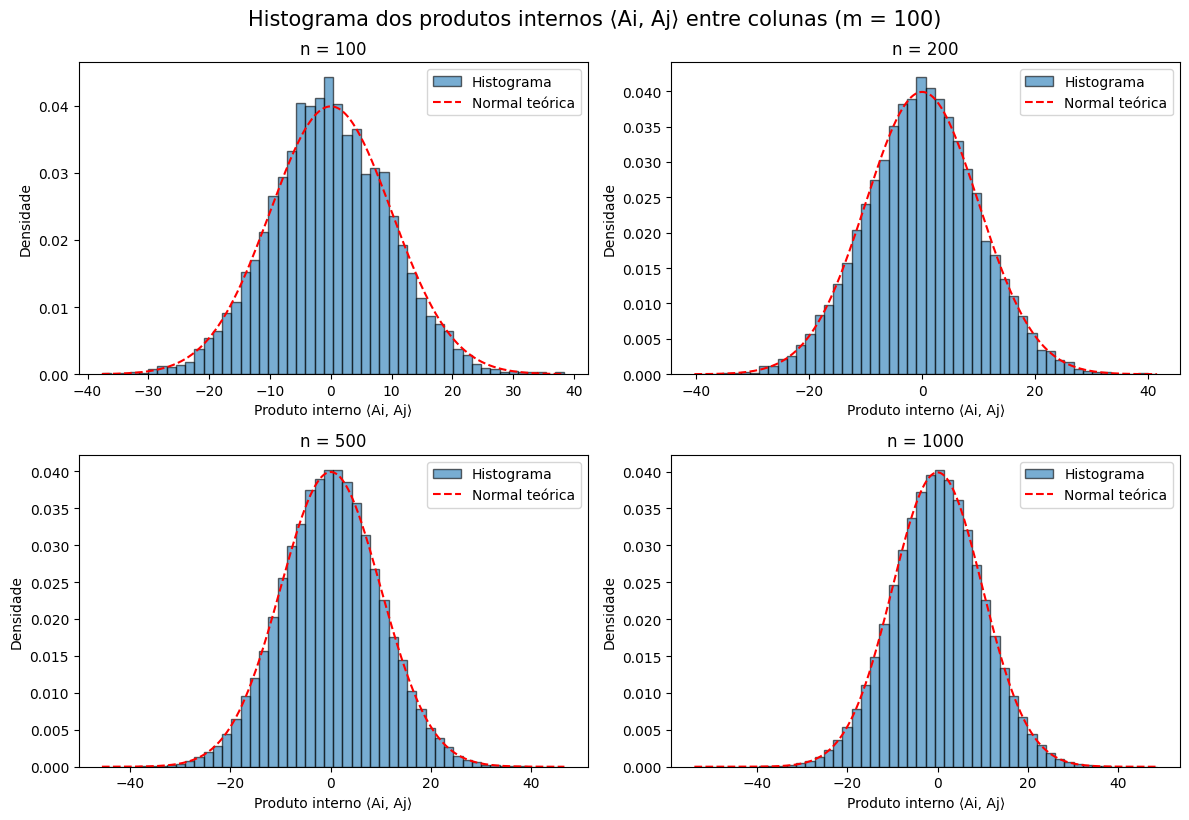

In [7]:
n_s = [100, 200, 500, 1000]
i=0

plt.figure(figsize=(12, 8))

for n in n_s:
    A = np.random.normal(0, 1, size=(100, n)) 
    
    G = A.T @ A 
    produtos_internos = G[~np.eye(n, dtype=bool)] # Remove os elementos da diagonal
    i += 1

    # Parâmetros da normal teórica
    mu = 0
    sigma = np.sqrt(100)  # Var(⟨Ai,Aj⟩) ≈ m

    # Histograma
    plt.subplot(2, 2, i)
    count, bins, _ = plt.hist(produtos_internos, bins=50, density=True, edgecolor='black', alpha=0.6, label='Histograma')

    # Curva normal teórica
    x = np.linspace(bins[0], bins[-1], 1000)
    y = norm.pdf(x, mu, sigma)
    plt.plot(x, y, 'r--', label='Normal teórica')

    plt.title(f"n = {n}")
    plt.xlabel("Produto interno ⟨Ai, Aj⟩")
    plt.ylabel("Densidade")
    plt.legend()

    print(f"n = {n}")
    print(f"Média empírica: {np.mean(produtos_internos):.2f}, Esperança teórica: 0")
    print(f"Desvio empírico: {np.std(produtos_internos):.2f}, Teórico: {np.sqrt(100):.2f}")
    print()

plt.tight_layout()
plt.suptitle("Histograma dos produtos internos ⟨Ai, Aj⟩ entre colunas (m = 100)", fontsize=15, y=1.02)


O histograma está sendo feito com densidade, pois assim é possível visualizar a semelhança com a distribuição normal padrão e preservar a forma característica da distribuição dos produtos internos. A distribuição de $\langle A_i, A_j \rangle$, para $i \ne j$, se assemelha à distribuição normal quando $n \to \infty$. Isso pode ser provado pelo fato de que todo elemento é gerado da mesma forma ($a \sim \mathcal{N}(0, 1)$) de maneiras independentes e $\langle A_i, A_j \rangle = \sum_{k=1}^m a_{ki}a_{kj}, \forall \  i, j$. Como todo $a$ é normal, $\mathbb{E}[a] = 0, \forall \  a$, logo $\mathbb{E}[\langle A_i, A_j \rangle] = \sum_{k=1}^m \mathbb{E}[a_{ki}a_{kj}] = \sum_{k=1}^m \mathbb{E}[a_{ki}]\mathbb{E}[a_{kj}] = \sum_{k=1}^m 0 \times 0 = 0$, sendo a média de $\langle A_i, A_j \rangle$ igual a zero. Em relação à variância, temos que  $Var[XY] = \mathbb{E}[X^2] \mathbb{E}[Y^2]$, mas como todo $a$ é normal, $\mathbb{E}[a^2] = Var[a] + (\mathbb{E}[a])^2 = 1 + 0 = 1, \forall \  a$, logo  $Var[\langle A_i, A_j \rangle] = \sum_{k=1}^m Var[a_{ki}a_{kj}] = \sum_{k=1}^m \mathbb{E}[a_{ki}^2] \mathbb{E}[a_{kj}^2] = \sum_{k=1}^m 1 \times 1 = m$. Como a variância é $m$, o desvio padrão é $\sqrt{m}$; Logo, a distribuição de $\langle A_i, A_j \rangle$, para $i \ne j$, realmente se assemelha a uma normal $\mathcal{N}(0, \sqrt{m}) = \mathcal{N}(0, \sqrt{100}) = \mathcal{N}(0, 10)$.

### c) A distribuição do máximo. Queremos ver quão “não ortogonal” é a matriz A. Para isto, vamos estudar o máximo de |⟨Ai,Aj⟩| / ∥Ai∥∥Aj∥ entre colunas distintas de uma matriz gaussiana A. Para isto, gere K = 1000 matrizes gaussianas Ak de ordem 100 × 300, calcule o máximo indicado acima, e faça um histograma dos K valores obtidos.

In [8]:
def similaridade_cosseno(a, b):
    num = np.abs(np.dot(a, b))
    den = np.linalg.norm(a) * np.linalg.norm(b)
    return num / den

    
def calc_loop(k, m=100, n=300):

    hist_max_ks_loop = []

    for _ in range(k):
        A = np.random.normal(0, 1, (m, n))
        hist_ks = []
        for i in range(len(A.T)):
            for j in range(i + 1, len(A.T)):
                a = similaridade_cosseno(A[:, i], A[:, j])
                hist_ks.append(a)


        hist_max_ks_loop.append(np.max(hist_ks))

    return hist_max_ks_loop


def calc_vect(k, m=100, n=300):
    hist_max_ks_vec = []

    for _ in range(k):
        A = np.random.normal(0, 1, (m, n))

        norms = np.linalg.norm(A, axis=0)
        A_normalizado = A / norms

        S = np.abs(A_normalizado.T @ A_normalizado)
        np.fill_diagonal(S, 0)

        hist_max_ks_vec.append(np.max(S))
    
    return hist_max_ks_vec


k1 = 1500

# < Método com loops >
start = time.time()
hist_max_ks_loop = calc_loop(k1)
end = time.time()
tempo_loop = end - start


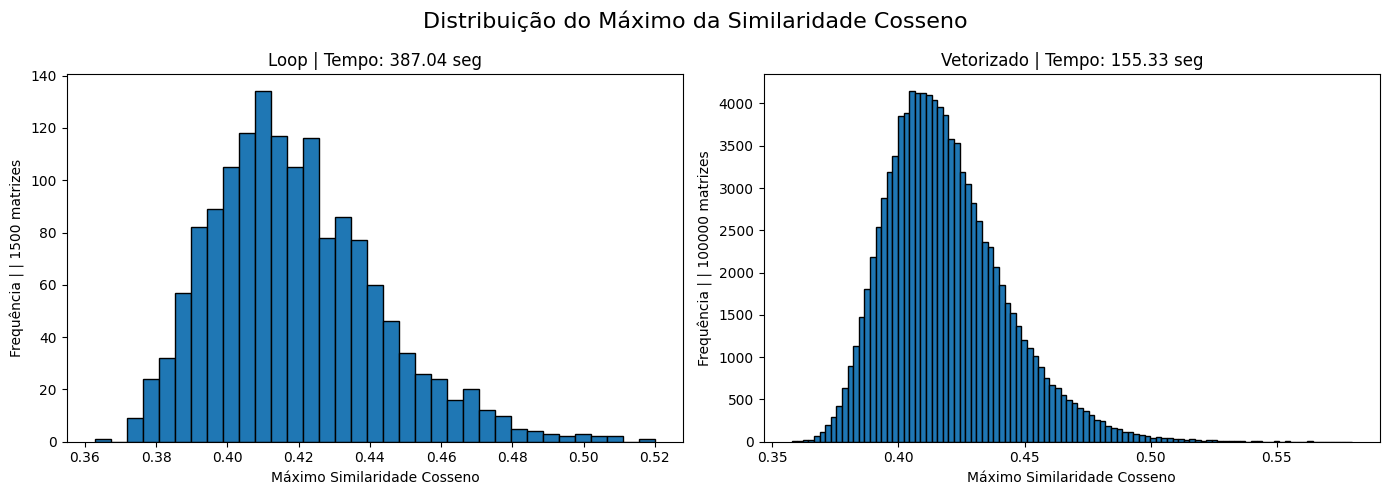

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(hist_max_ks_loop, bins=35, edgecolor='black')
axes[0].set_title(f"Loop | Tempo: {tempo_loop:.2f} seg")
axes[0].set_xlabel("Máximo Similaridade Cosseno")
axes[0].set_ylabel(f"Frequência | | {k1} matrizes")

k2 = 100000

# < Método verotizado >
start = time.time()
hist_max_ks_vec = calc_vect(k2)
end = time.time()
tempo_vec = end - start


axes[1].hist(hist_max_ks_vec, bins=100, edgecolor='black')
axes[1].set_title(f"Vetorizado | Tempo: {tempo_vec:.2f} seg")
axes[1].set_xlabel("Máximo Similaridade Cosseno")
axes[1].set_ylabel(f"Frequência | | {k2} matrizes")

plt.suptitle("Distribuição do Máximo da Similaridade Cosseno", fontsize=16)
plt.tight_layout()


Foi computado a similaridade do cosseno das colunas de $A_{100,300}$ para matrizes distintas de duas formas: a primeira é o "método didático" que usa várias estruturas de repetição em python, sem se importar com a performática do código; a segunda forma, mais otimizada, normaliza as colunas de A previamente, pode-se fazer isso pois a similaridade do cosseno não é afetado pelo tamanho do vetor, assim com vetores normalizados passamos de $cos(\theta) = \frac{ | \langle A_i A_j \rangle |}{||A_i||||A_j||}$ para $cos(\theta) = | \langle A_i A_j \rangle |$, o que justifica fazer $A^TA$, pois cada entrada $i$, $j$ desta matriz será o produto interno das colunas $i$ e $j$ de $A$ (temos que zerar a diagonal no processo pois queremos apenas produtos internos de colunas distintas)

Testamos com $K_s$ um pouco maiores que 1000, especificamente 1500 para o método didático e 100.000 para vetorizado.

Podemos observar que os valores máximos de produtos internos entre colunas de uma matriz geram uma distribuição com valores mais frequentes próximos de 0,42, tanto para 1500 como para 100.00! Com pouquísima frequêcia abaixo de 0,37 e acima de 0,50!

### d) Complexidade computacional. Qual a complexidade de calcular o máximo acima? Qual valor de K você acha que seria bom para ter uma boa estimativa do máximo esperado?

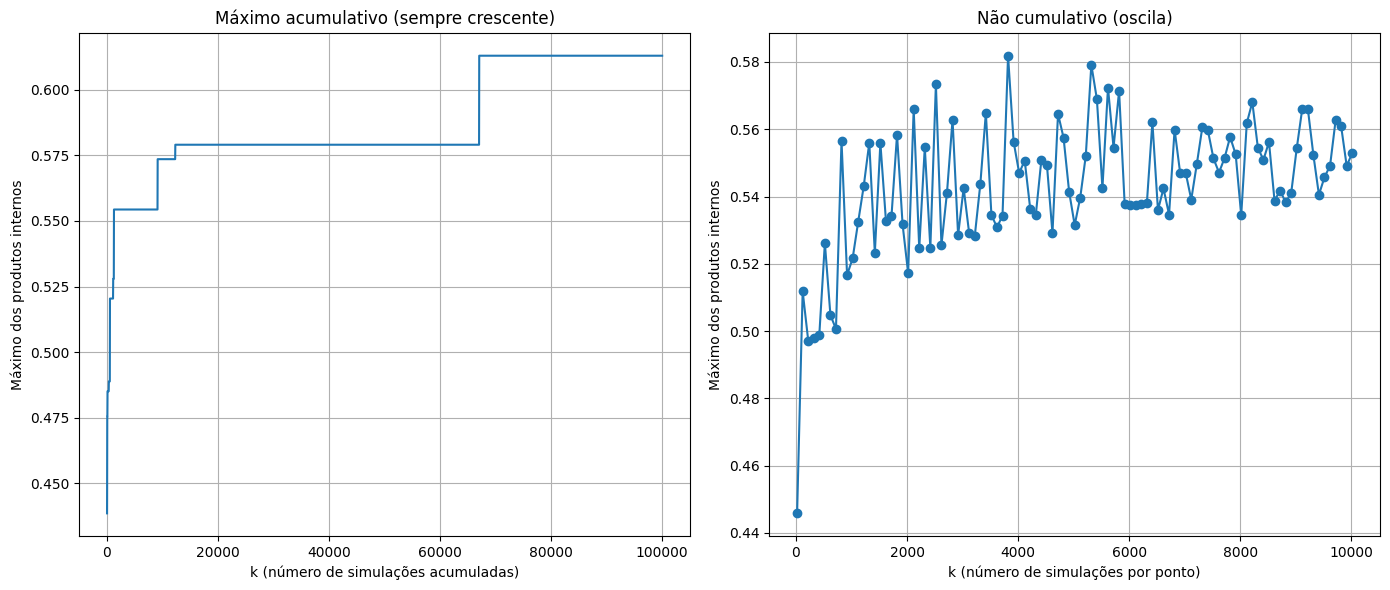

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# cumulativo
ks_cumulativo = list(range(10, 100001, 10))
maximos_por_k_cum = []
historico_maximos = []

for k in ks_cumulativo:
    novos_maximos = calc_vect(10)  # 10 novos a cada step
    historico_maximos.extend(novos_maximos)
    maximos_por_k_cum.append(np.max(historico_maximos))

axs[0].plot(ks_cumulativo, maximos_por_k_cum)
axs[0].set_xlabel("k (número de simulações acumuladas)")
axs[0].set_ylabel("Máximo dos produtos internos")
axs[0].set_title("Máximo acumulativo (sempre crescente)")
axs[0].grid(True)


# não acumulando ks
ks_nao_cumulativo = list(range(20, 10021, 100))
maximos_por_k_nao_cum = []

for k in ks_nao_cumulativo:
    resultados = calc_vect(k) 
    maximos_por_k_nao_cum.append(np.max(resultados))

axs[1].plot(ks_nao_cumulativo, maximos_por_k_nao_cum, marker='o')
axs[1].set_xlabel("k (número de simulações por ponto)")
axs[1].set_ylabel("Máximo dos produtos internos")
axs[1].set_title("Não cumulativo (oscila)")
axs[1].grid(True)

plt.tight_layout()


Tomando $K$ o número de matrizes $A_{n,m}$ calculadas, por iteração, calculamos $\frac{m(m-1)}{2}$ produtos internos, cada produto interno tem custo assintótico $n$, chegamos que a complexidade computacional de calcular o máximo acima, será $O(K\frac{m(m-1)}{2}n)$ o que assintoticamente seria $O(Km²n)$ ou $O(m²n)$ por iteração.
    
Considerando o valor máximo esperado como o máximo dos máximos, o máximo esperado teórico seria 1, pois o $cos(\theta) = \frac{| \langle x, x \rangle |}{|| x || || x ||} = 1 = \cos(0)$, porém isso só é possível quando a matriz rand.uniform gera duas colunas iguais, não é impossível, só extremamente improvável. Na prática, o que observamos é que para $K > 2000$ gera consistentemente máximos $\ge 0,5$, se continuarmos a aumentar os $Ks$, os máximos aumentam sensivelmente mais devagar. O máximo nunca diminui pois estamos acumulando $Ks$ anteriores para computar os novos $Ks$ e tirar os novos máximos, o que ajuda bastante na otimização e não afeta significativamente o experimento empírico! Ao lado fizemos um gráfico não que não cumulativo de Ks, mas com valores mais humildes!

Critério de parada atingido em k = 1500, média = 0.419689


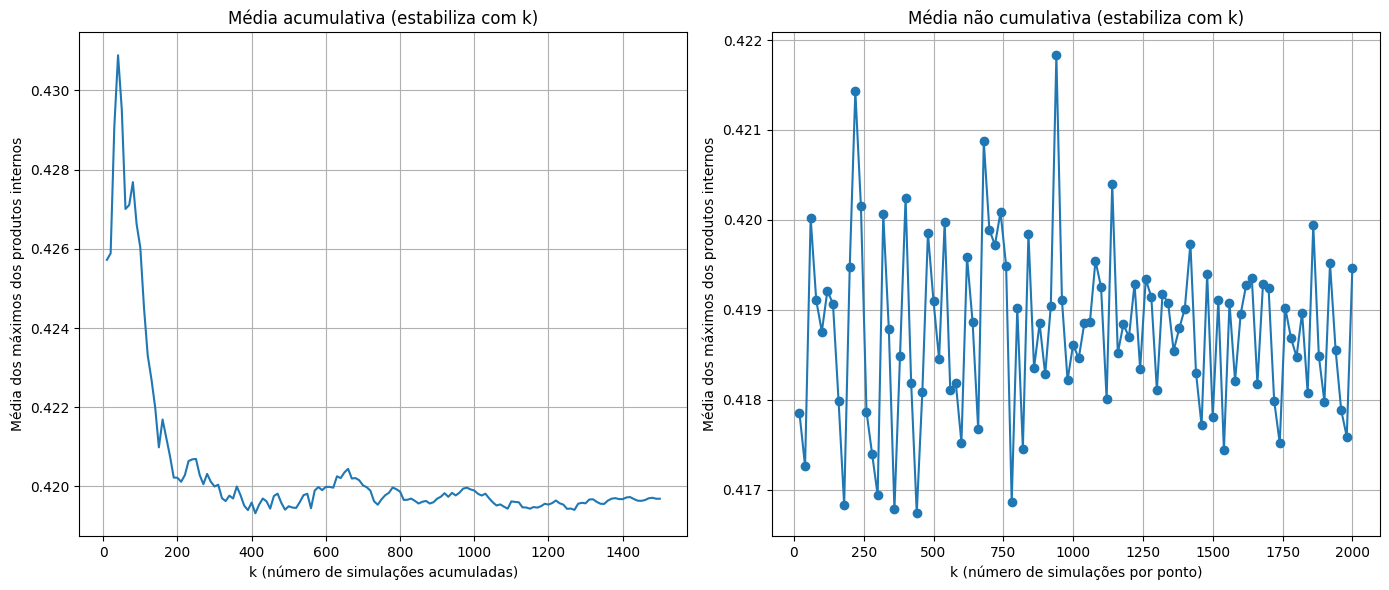

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

medias_por_k_cum = []
historico_maximos = []
ks_usados = []

epsilon = 1e-4
janela = 15
max_iter = 2000

for i in range(max_iter):
    novos_maximos = calc_vect(10)
    historico_maximos.extend(novos_maximos)

    media_valor = np.mean(historico_maximos)
    medias_por_k_cum.append(media_valor)
    ks_usados.append((i+1)*10)

    # verifica estabilidade na janela dos últimos 15 valores
    if i + 1 >= janela:
        ultimos = medias_por_k_cum[-janela:]
        variacao_maxima = np.max(ultimos) - np.min(ultimos)

        if variacao_maxima < epsilon:
            print(f"Critério de parada atingido em k = {(i+1)*10}, média = {media_valor:.6f}")
            break

axs[0].plot(ks_usados, medias_por_k_cum)
axs[0].set_xlabel("k (número de simulações acumuladas)")
axs[0].set_ylabel("Média dos máximos dos produtos internos")
axs[0].set_title("Média acumulativa (estabiliza com k)")
axs[0].grid(True)


# não acumulando ks
medias_por_k_nao_cum = []
ks_nao_cumulativo = []

epsilon = 1e-3
janela = 15
max_iter = 100  
passo_k = 20

for i in range(max_iter):
    k_atual = (i+1) * passo_k
    resultados = calc_vect(k_atual)
    media_valor = np.mean(resultados)

    medias_por_k_nao_cum.append(media_valor)
    ks_nao_cumulativo.append(k_atual)

    # verifica estabilidade da média na janela móvel
    if i + 1 >= janela:
        ultimos = medias_por_k_nao_cum[-janela:]
        variacao_maxima = np.max(ultimos) - np.min(ultimos)

        if variacao_maxima < epsilon:
            print(f"Critério de parada (não cumulativo) atingido em k = {k_atual}, média = {media_valor:.6f}")
            break

axs[1].plot(ks_nao_cumulativo, medias_por_k_nao_cum, marker='o')
axs[1].set_xlabel("k (número de simulações por ponto)")
axs[1].set_ylabel("Média dos máximos dos produtos internos")
axs[1].set_title("Média não cumulativa (estabiliza com k)")
axs[1].grid(True)

plt.tight_layout()

Considerando o valor máximo esperado como a média dos máximos, o comportamento é bem diferente do observado ao analisar o máximo absoluto, pois não buscamos um valor extremo (como 1), mas sim a média dos valores máximos obtidos. Na prática, considerando a convergência para um $\epsilon < 1^{-4}$ nas últimas 15 médias consecutivas, o valor esperado para o máximo ocorreu para $k=1500$, com a média de 0.419689, o que representa melhor o grau de não ortogonalidade mais comum entre as colunas. Isso ocorre porque, quando acumulados os dados, diminuimos a variância para números maiores de simulações, eliminando o impacto de possíveis outliers; por isso o gráfico da média não cumulativa não seria tão bom para estimar o valor esperado de $k$ (não convergiu), pois ele não suaviza o impacto dos os outliers. 

### e) A distribuição do máximo, parte 2. Escolha valores de K correspondentes e faça histogramas e comente os resultados para os seguintes pares de (m, n): (100, 100), (100, 300), (200, 200), (200, 600), (500, 500), (500, 1500), (1000, 1000), (1000, 3000).

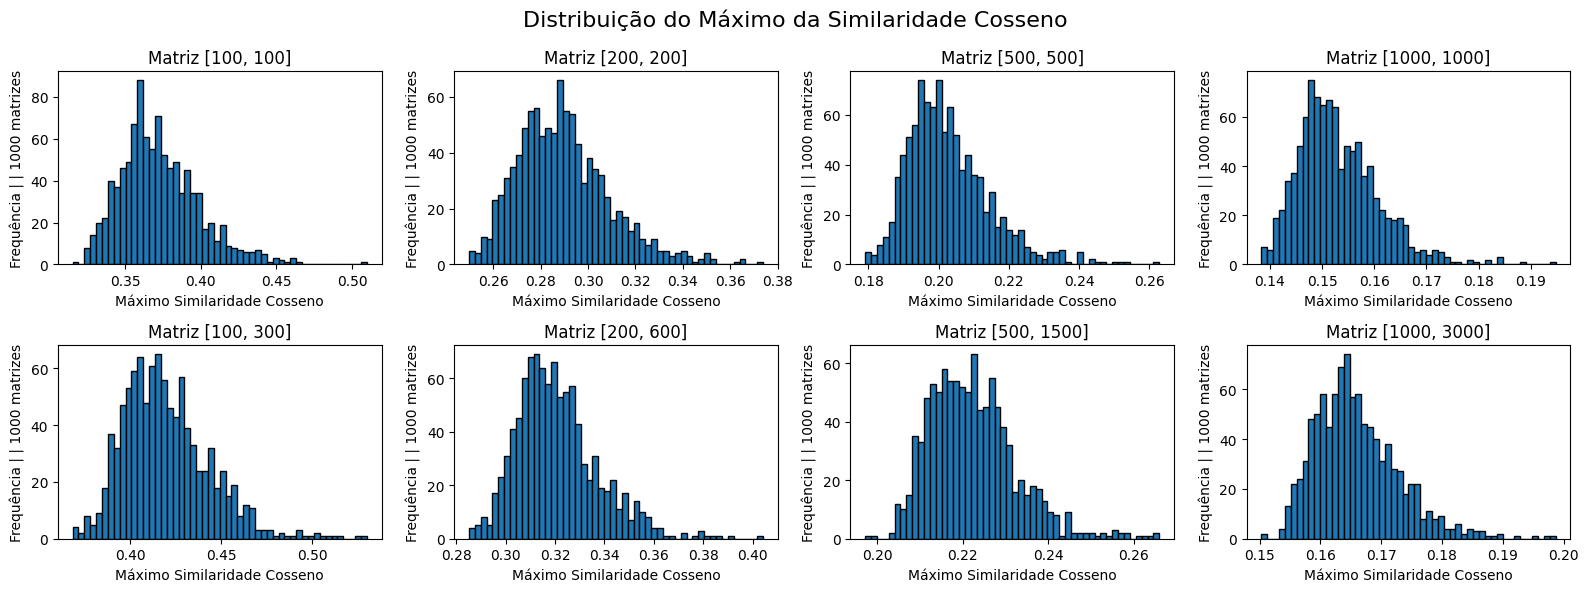

In [12]:
fig, axes = plt.subplots(2, 4, figsize=(16, 6))

mn = [[100, 100], [100, 300], [200, 200], [200, 600], [500, 500], [500, 1500], [1000, 1000], [1000, 3000]]
ax = [[0,0], [1,0], [0,1], [1,1], [0,2], [1,2], [0,3], [1,3]]

for i in range(8):

    hist_max_i = calc_vect(1000, mn[i][0], mn[i][1])

    axes[ax[i][0]][ax[i][1]].hist(hist_max_i, bins=50, edgecolor='black')
    axes[ax[i][0]][ax[i][1]].set_title(f"Matriz {mn[i]}")
    axes[ax[i][0]][ax[i][1]].set_xlabel("Máximo Similaridade Cosseno")
    axes[ax[i][0]][ax[i][1]].set_ylabel(f"Frequência | | 1000 matrizes")

plt.suptitle("Distribuição do Máximo da Similaridade Cosseno", fontsize=16)
plt.tight_layout()

É possível ver que, à medida que o número de linhas aumenta (mantendo o número de colunas com a mesma proporção), o máximo e a moda do valor máximo de $\frac{|\langle A_i, A_j \rangle|}{||A_i|| \  ||A_j||}$ tendem a diminuir. Isso ocorre porque, como todos os elementos são gerados de forma $\mathcal{N}(0, 1)$, à medida que $m$ cresce, os vetores começam a ocupar um espaço de dimensão maior, e vetores gaussianos aleatórios (vetores cujas entradas seguem uma distribuição normal) tendem a se tornar quase ortogonais em altas dimensões (concentração da medida). Isso faz com que o valor do cosseno do ângulo vá se aproximando de 0 à medida que $m$ vai se tornando maior.

Já se compararmos matrizes com o mesmo número de linhas $m$, mas com mais colunas (por exemplo, $m$ e $3m$), percebemos que o máximo e a moda do valor máximo são ligeiramente maiores para o caso com mais colunas. Isso acontece porque aumenta o número de pares de vetores, elevando também a chance de haver ao menos um par de vetores mais próximos: mesmo que a maioria dos vetores seja aproximadamente ortogonal, a presença de muitos pares aumenta a probabilidade de se encontrar uma exceção com alta similaridade, ou seja, com ângulo pequeno e cosseno maior.

Também é possível interpretar que, à medida que $m$ aumenta, a variabilidade entre execuções diminui, isso é, os vetores aleatórios se tornam quase ortogonais e os valores do máximo se concentram mais fortemente em torno de um valor fixo. Por isso, seria necessário um número menor de repetições $K$ para estimar a moda do máximo com boa precisão.